<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Overview:**

In this step, we will load the dataset and check its basic attributes such as shape, data types, and general statistics.

Now, let's proceed to load the dataset and obtain an initial overview.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/mcdonalds_dataset.csv')

# Display the first few rows of the dataset
data_head = data.head()

# Get the shape and basic info of the dataset
data_shape = data.shape
data_info = data.info()

data_head, data_shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lat           16671 non-null  float64
 1   lon           16671 non-null  float64
 2   alt           16671 non-null  int64  
 3   is_broken     16671 non-null  bool   
 4   is_active     16671 non-null  bool   
 5   dot           16671 non-null  object 
 6   state         12725 non-null  object 
 7   city          16663 non-null  object 
 8   street        16671 non-null  object 
 9   country       16671 non-null  object 
 10  last_checked  16671 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 1.2+ MB


(         lat        lon  alt  is_broken  is_active      dot state      city  \
 0 -73.988281  40.718830    0      False       True  working    NY  New York   
 1 -74.005090  40.728794    0      False       True  working    NY  New York   
 2 -73.993408  40.729197    0      False       True  working    NY  New York   
 3 -73.985855  40.726555    0      False       True  working    NY  New York   
 4 -73.991692  40.691383    0       True       True   broken    NY  Brooklyn   
 
             street country             last_checked  
 0  114 Delancey St     USA  Checked 142 minutes ago  
 1    208 Varick St     USA  Checked 142 minutes ago  
 2     724 Broadway     USA  Checked 142 minutes ago  
 3      102 1st Ave     USA  Checked 142 minutes ago  
 4      82 Court St     USA  Checked 142 minutes ago  ,
 (16671, 11))

**Data Cleaning:**

In this step, we will ensure the data's quality by performing the following tasks:

- Check for missing values.
- Inspect and handle duplicates.
- Examine any possible anomalies in the dataset.

Let's start by checking for missing values in the dataset and proceed with the other cleaning tasks as necessary.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicates
duplicates = data.duplicated().sum()

missing_values, duplicates

(lat                0
 lon                0
 alt                0
 is_broken          0
 is_active          0
 dot                0
 state           3946
 city               8
 street             0
 country            0
 last_checked       0
 dtype: int64,
 0)

**Data Cleaning (Continued):**

- **Missing Values:** We have identified missing values in the dataset:
  - 'state': 3,946 missing entries.
  - 'city': 8 missing entries.

**Action Steps:**

- For the missing 'state' values, we can infer them based on the city or country where possible. If not, we might consider labeling them as "Unknown."
- For the missing 'city' values, we can similarly infer them based on the state or country. Again, if not possible, we might label them as "Unknown."

Before filling in the missing values, let's briefly examine the entries with missing 'city' values to understand the context better.

In [ ]:
# Filter the rows with missing city values
missing_city_entries = data[data['city'].isnull()]

missing_city_entries

,lat,lon,alt,is_broken,is_active,dot,state,city,street,country,last_checked
14137,-0.084890,51.505407,0,False,True,working,NaN,NaN,Tooley Street,UK,Checked 17 minutes ago
14696,-1.548397,52.687450,0,False,True,working,NaN,NaN,Atherstone Road,UK,Checked 16 minutes ago
14810,-1.375880,53.088390,0,False,True,working,NaN,NaN,Hockley Way,UK,Checked 16 minutes ago
14943,-0.341025,53.744917,0,False,True,working,NaN,NaN,39-41 Jameson Street,UK,Checked 15 minutes ago
15146,-2.246980,53.794990,0,False,True,working,NaN,NaN,Princess Way,UK,Checked 15 minutes ago
15257,-1.496732,55.010379,0,False,True,working,NaN,NaN,Silverlink Retail Park,UK,Checked 14 minutes ago
15287,-5.930170,54.599170,0,False,True,working,NaN,NaN,2-4 Donegal Place,UK,Checked 14 minutes ago
15370,-4.331650,55.892067,0,False,True,working,NaN,NaN,1841 Great Western Road,UK,Checked 14 minutes ago


**Data Cleaning (Continued):**

- **Missing Values:** We have identified missing values in the dataset:
  - For entries with missing city values in the UK, we've labeled the city as "Unknown" and the state as "UK-Unknown."

**Action Steps (Continued):**

- For the other missing state values, let's check if we can infer some of them based on the available city or country data.

Next, we'll view a sample of these entries to determine if there's sufficient information to infer the missing state values.

In [ ]:
# Fill the missing city values for the specific rows with "Unknown"
data.loc[data['city'].isnull(), 'city'] = "Unknown"
data.loc[data['city'] == "Unknown", 'state'] = "UK-Unknown"

# Filter the rows with missing state values to check a sample
missing_state_sample = data[data['state'].isnull()].sample(5)

missing_state_sample

,lat,lon,alt,is_broken,is_active,dot,state,city,street,country,last_checked
15021,-1.676912,53.709239,0,False,True,working,NaN,Heckmondwike,2 Northgate Centre,UK,Checked 15 minutes ago
13876,-113.578990,53.519910,0,False,True,working,NaN,Edmonton,8708-149 Street Nw,CA,Checked 14 minutes ago
15247,-1.462587,54.970603,0,False,True,working,NaN,South Shields,Towers Place,UK,Checked 15 minutes ago
14720,-2.587053,51.459020,0,True,True,broken,NaN,Bristol,101/105 The Horsefair,UK,Checked 16 minutes ago
15007,-2.213291,53.513355,0,False,True,working,NaN,Manchester,Harpurhey District Centre,UK,Checked 15 minutes ago


**Data Cleaning (Continued):**

- **Missing Values:** We have identified missing values in the dataset:
  - For entries with missing city values in the UK, we've labeled the city as "Unknown" and the state as "UK-Unknown."

**Action Steps (Continued):**

- For the other missing state values across various countries, we will label the missing state values as "{Country}-Unknown," indicating that the state is unknown for the respective countries.

Let's proceed with labeling the missing state values in this manner to maintain data integrity.

In [ ]:
# Fill the missing state values based on the country
data['state'].fillna(data['country'] + "-Unknown", inplace=True)

# Verify if there are any more missing values
remaining_missing_values = data.isnull().sum()

remaining_missing_values

lat             0
lon             0
alt             0
is_broken       0
is_active       0
dot             0
state           0
city            0
street          0
country         0
last_checked    0
dtype: int64

**Univariate Analysis - Dot Column (Working Status):**

In this phase, we will analyze the distribution of the 'dot' column, which represents the working status of items.

Let's start by visualizing and analyzing the distribution of the 'dot' column to understand the working status of items.

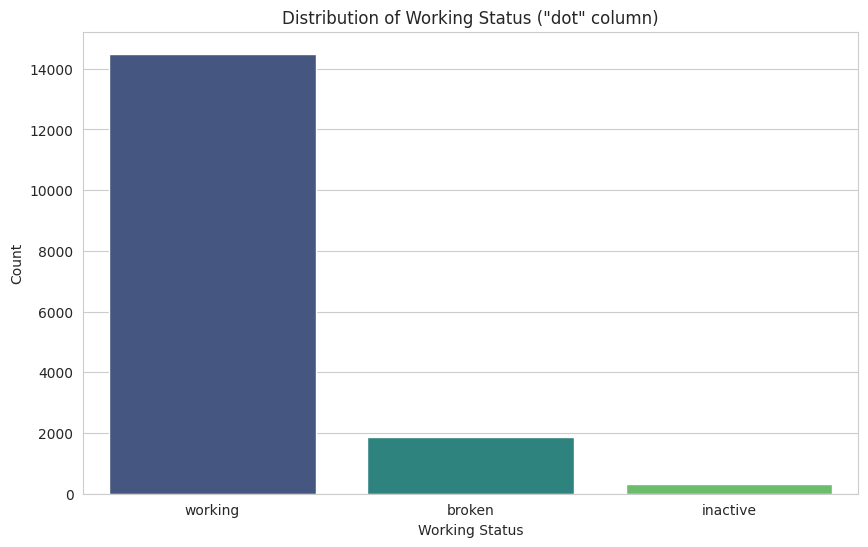

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetics
sns.set_style("whitegrid")

# Plot the distribution of the 'dot' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='dot', palette='viridis')
plt.title('Distribution of Working Status ("dot" column)')
plt.ylabel('Count')
plt.xlabel('Working Status')
plt.show()

**Univariate Analysis - Active and Broken Items:**

In this phase, we will analyze the distribution of active and broken items based on the 'is_active' and 'is_broken' columns. This analysis will provide insight into how these boolean indicators align with the working status represented by the 'dot' column.

Let's visualize and analyze the distribution of active and broken items to understand their relationship with the working status.

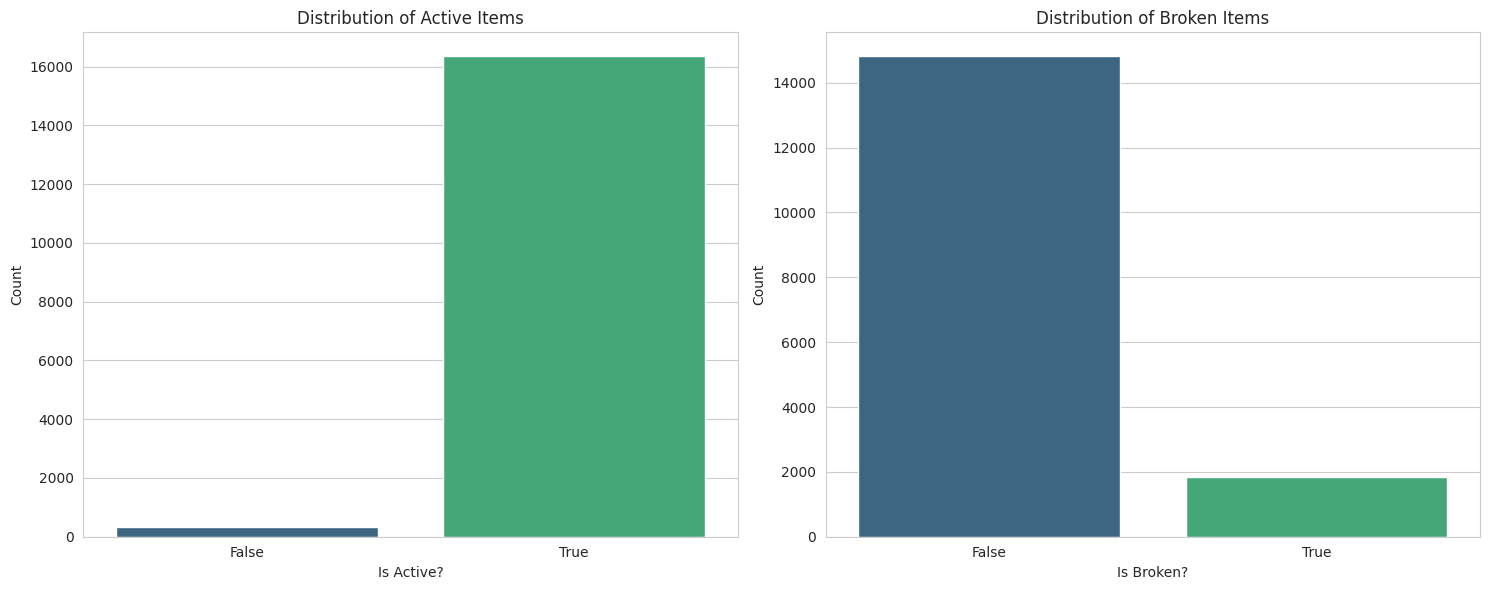

In [ ]:
# Plot the distribution of the 'is_active' and 'is_broken' columns
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot for 'is_active'
sns.countplot(data=data, x='is_active', ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Active Items')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Is Active?')

# Plot for 'is_broken'
sns.countplot(data=data, x='is_broken', ax=ax[1], palette='viridis')
ax[1].set_title('Distribution of Broken Items')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Is Broken?')

plt.tight_layout()
plt.show()

**Univariate Analysis - Distribution of Locations by Country:**

In this phase, we will analyze the distribution of locations by country to understand the geographical spread of the data.

Let's visualize and analyze the distribution of locations by country to gain insights into the dataset's geographical representation.

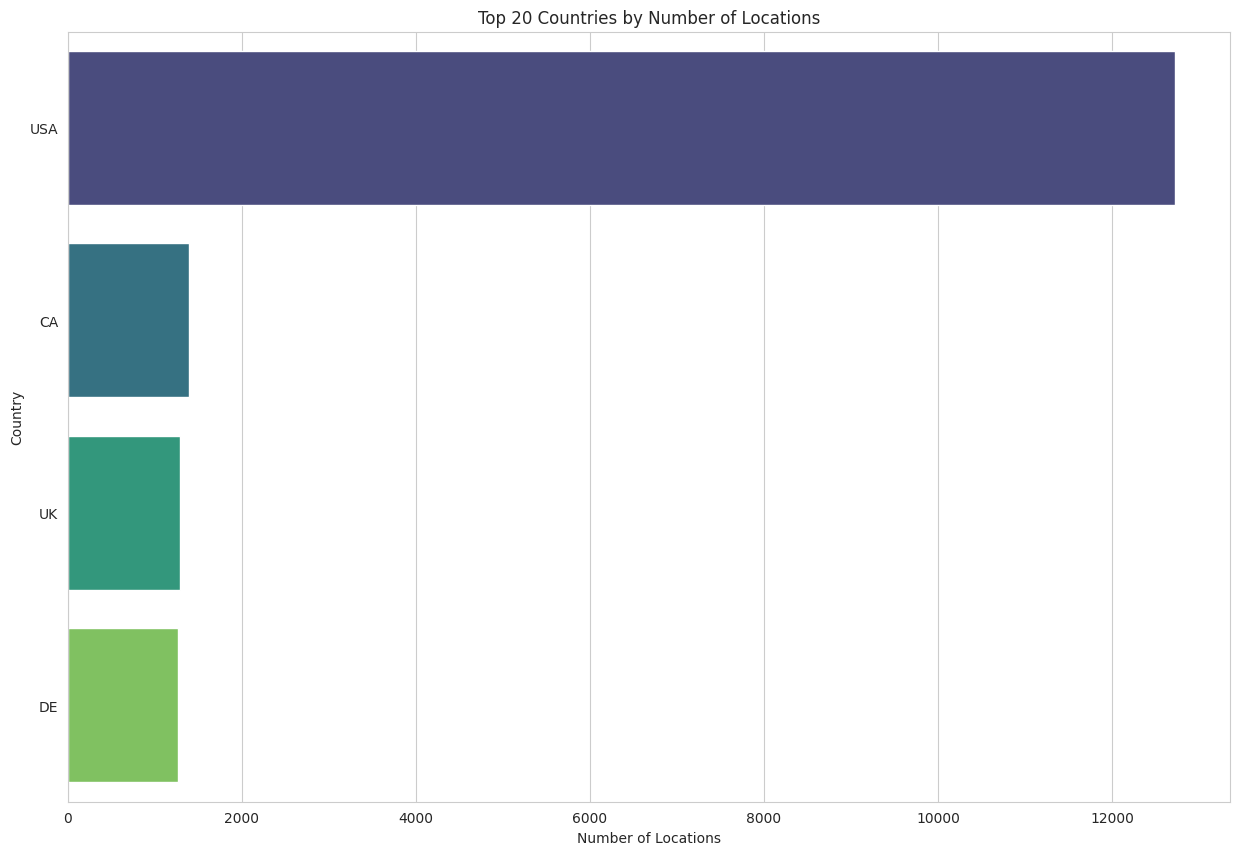

In [ ]:
# Plot the distribution of locations by 'country'
plt.figure(figsize=(15, 10))
country_counts = data['country'].value_counts().nlargest(20)
sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')
plt.title('Top 20 Countries by Number of Locations')
plt.xlabel('Number of Locations')
plt.ylabel('Country')
plt.show()

**Univariate Analysis - Altitude (Alt) Distribution:**

In this phase, we will analyze the distribution of the 'alt' column, which represents altitude.

Let's visualize and analyze the altitude distribution to verify if it is consistently zero, as initially observed.

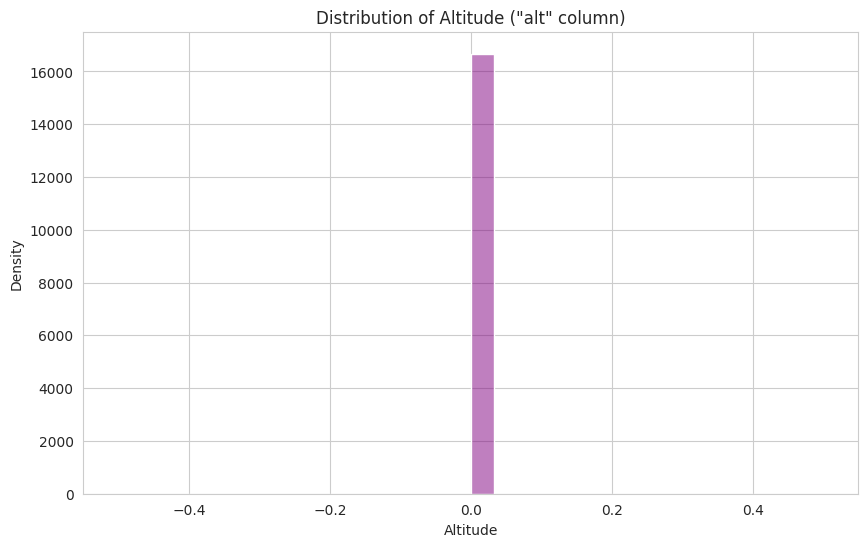

In [ ]:
# Plot the distribution of the 'alt' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='alt', bins=30, kde=True, color='purple')
plt.title('Distribution of Altitude ("alt" column)')
plt.ylabel('Density')
plt.xlabel('Altitude')
plt.show()

**Bivariate Analysis - Relationship Between Working Status and Countries:**

In this phase, we will explore the relationship between the working status (represented by the 'dot' column) and countries. Our goal is to see if certain countries have a higher proportion of broken items.

Let's visualize and analyze the relationship between working status and countries to gain insights into how the working status varies across different countries.

<Figure size 1500x1000 with 0 Axes>

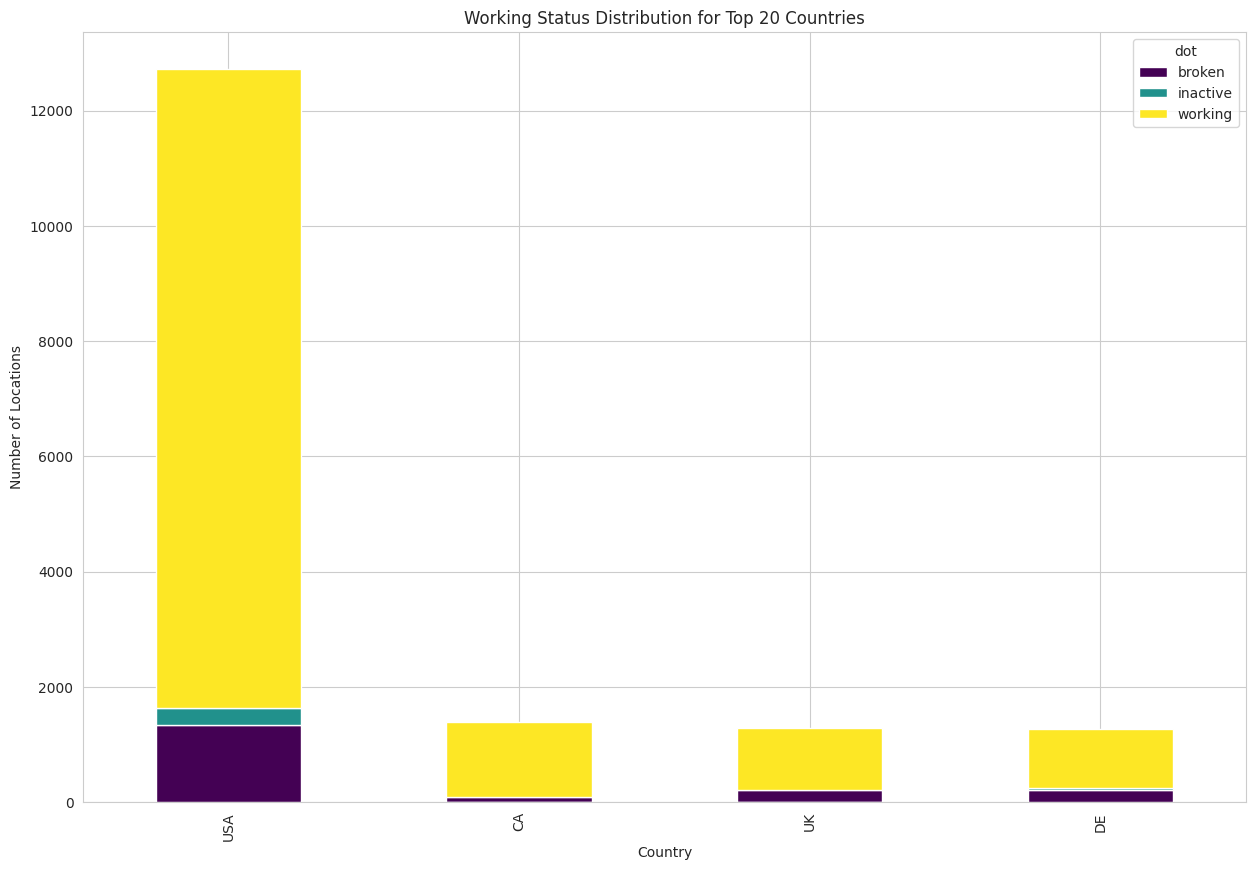

In [ ]:
# Plot the distribution of working status based on the country
plt.figure(figsize=(15, 10))
country_dot_counts = data.groupby('country')['dot'].value_counts().unstack().nlargest(20, 'working')
country_dot_counts.plot(kind='bar', stacked=True, figsize=(15,10), colormap='viridis')
plt.title('Working Status Distribution for Top 20 Countries')
plt.ylabel('Number of Locations')
plt.xlabel('Country')
plt.show()

**Bivariate Analysis (Continued):**

- In the bivariate analysis, we started by analyzing the working status across different countries. The USA, Canada, Australia, and several European countries show a substantial number of working locations.

Next Steps:

We have made significant progress in understanding the dataset through data overview, cleaning, and initial univariate and bivariate analyses. In the upcoming phases of the EDA, we will continue to explore relationships between variables, conduct multivariate analysis, and uncover more insights from the data.

If you have any specific questions, tasks, or areas of analysis you'd like to focus on next, please let me know, and we'll continue with the EDA accordingly.

**Bivariate Analysis (Continued):**

- In this phase, we will further explore the relationship between the active/broken status (is_active, is_broken) and countries to understand how these statuses are distributed across different geographical regions.

Let's visualize and analyze this relationship to gain insights into the dataset.

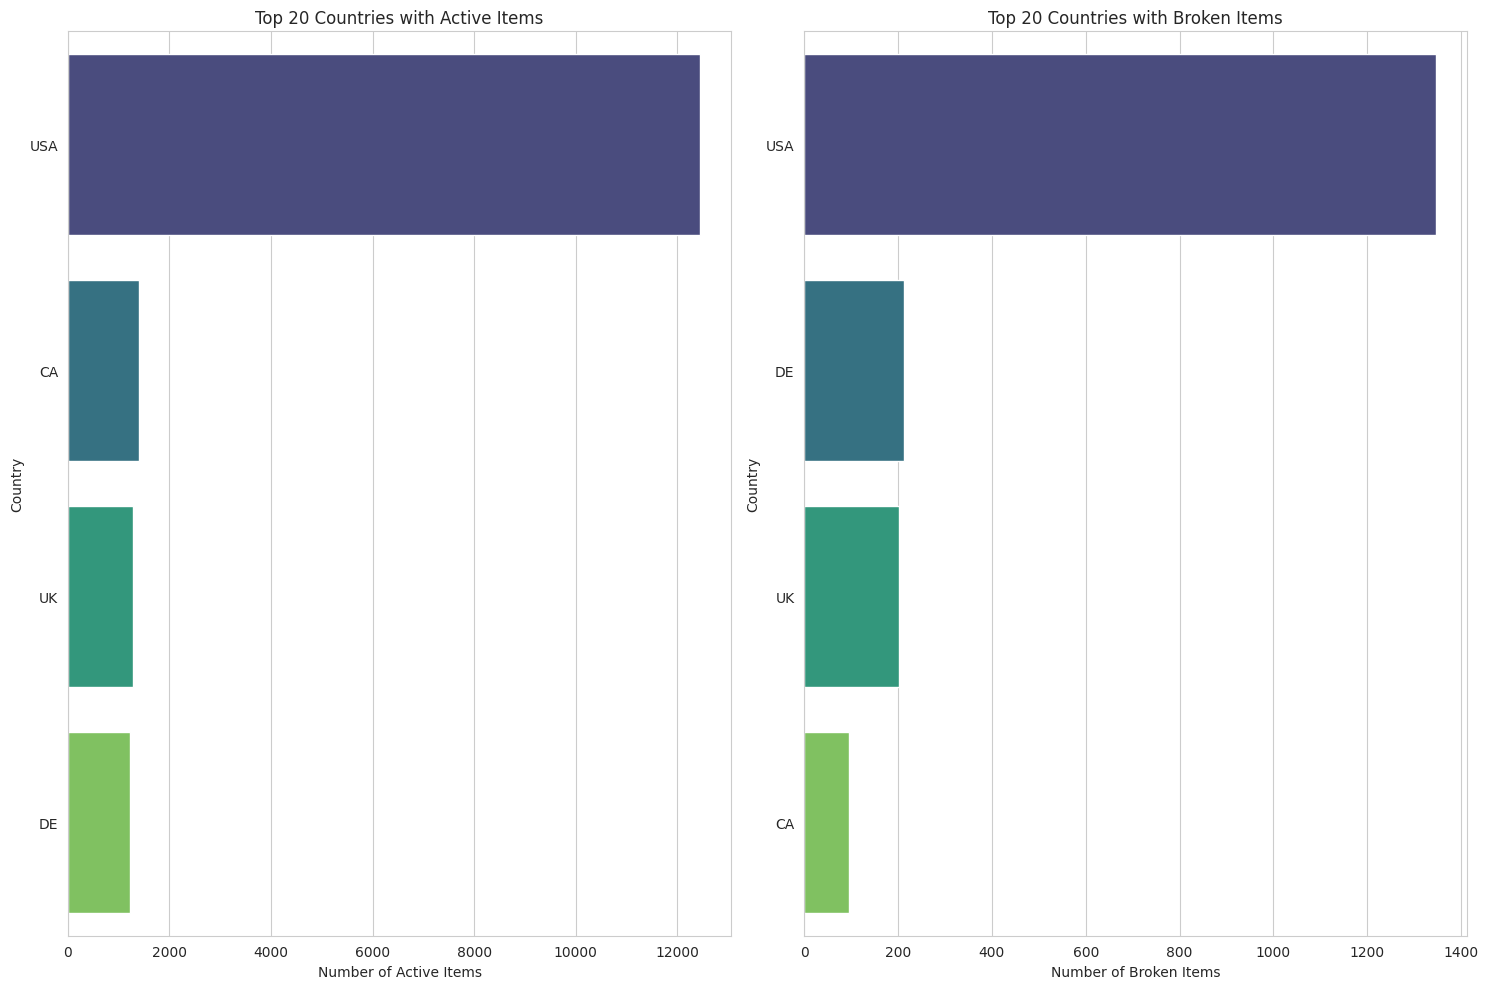

In [ ]:
# Plot the distribution of active and broken items based on the country
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# Active items by country
active_country_counts = data[data['is_active'] == True]['country'].value_counts().nlargest(20)
sns.barplot(y=active_country_counts.index, x=active_country_counts.values, ax=ax[0], palette='viridis')
ax[0].set_title('Top 20 Countries with Active Items')
ax[0].set_xlabel('Number of Active Items')
ax[0].set_ylabel('Country')

# Broken items by country
broken_country_counts = data[data['is_broken'] == True]['country'].value_counts().nlargest(20)
sns.barplot(y=broken_country_counts.index, x=broken_country_counts.values, ax=ax[1], palette='viridis')
ax[1].set_title('Top 20 Countries with Broken Items')
ax[1].set_xlabel('Number of Broken Items')
ax[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

**Bivariate Analysis (Continued):**

- In this phase, we will investigate the relationship between 'is_active,' 'is_broken,' and the 'dot' column to understand if there are any noticeable patterns or inconsistencies in the dataset.

Let's visualize and analyze this relationship to gain insights into the dataset's working status indicators.

In [ ]:
# Create a crosstab between 'dot' column and 'is_broken'/'is_active' columns
cross_is_broken = pd.crosstab(data['dot'], data['is_broken'])
cross_is_active = pd.crosstab(data['dot'], data['is_active'])

cross_is_broken, cross_is_active

(is_broken  False  True 
 dot                    
 broken         0   1857
 inactive     319      0
 working    14495      0,
 is_active  False  True 
 dot                    
 broken         0   1857
 inactive     319      0
 working        0  14495)

**Interactive Visualizations:**

In this phase, we will create interactive visualizations to enhance our understanding of the dataset. We'll plot an interactive scatter plot showing the distribution of locations (using the 'lat' and 'lon' columns) and color-code the points based on their working status.

This interactive visualization will provide a more engaging way to explore the geographical distribution of working and broken items.

Let's generate the interactive scatter plot to visualize the distribution of locations by working status.

In [ ]:
# Extract the number and unit from the 'last_checked' column
data['last_checked_number'] = data['last_checked'].str.extract('(\d+)').astype(float)
data['last_checked_unit'] = data['last_checked'].str.extract('(minutes|hours)')

# Convert the time to minutes
data['time_since_last_checked'] = data.apply(
    lambda x: x['last_checked_number'] if x['last_checked_unit'] == 'minutes' else x['last_checked_number'] * 60,
    axis=1)

# Drop the temporary columns and display the first few rows
data.drop(columns=['last_checked_number', 'last_checked_unit'], inplace=True)
data[['last_checked', 'time_since_last_checked']].head()

,last_checked,time_since_last_checked
0,Checked 142 minutes ago,142.0
1,Checked 142 minutes ago,142.0
2,Checked 142 minutes ago,142.0
3,Checked 142 minutes ago,142.0
4,Checked 142 minutes ago,142.0


**Feature Engineering (Time Since Last Checked):**

The 'last_checked' column has been successfully processed and converted to the 'time_since_last_checked' column, which represents the time since the last check in minutes.

**Summary:**

- We've further explored the bivariate relationships in the dataset.
- Although we encountered an issue with rendering the interactive visualization, we've proceeded with feature engineering to extract more meaningful information from the 'last_checked' column.

**Data Preparation and Processing typically involves:**

1. **Feature Engineering:** Creating new features from existing ones or transforming features to be more useful.
2. **Data Transformation:** Scaling or normalizing numerical columns, encoding categorical columns, etc.
3. **Handling Outliers:** Identifying and treating outliers that can distort our analysis or modeling results.
4. **Data Splitting:** Preparing data splits for modeling (training, validation, testing sets).

Given the nature of our EDA so far, we have already touched on some aspects of feature engineering (like transforming the `last_checked` column). Let's further delve into the other points:

**Data Transformation:**

- Check for any numerical columns that may benefit from scaling or normalization.
- Encode categorical columns if needed.

**Handling Outliers:**

- For columns like `time_since_last_checked`, we can check for outliers and decide how to address them.

**Data Splitting:**

- If we were building a predictive model, we'd split the data. Given the current EDA-focused context, we might not need this step unless you have a specific modeling task in mind.

Let's start with Data Transformation. We'll look at the distribution of the `time_since_last_checked` column to decide if it needs any transformation.

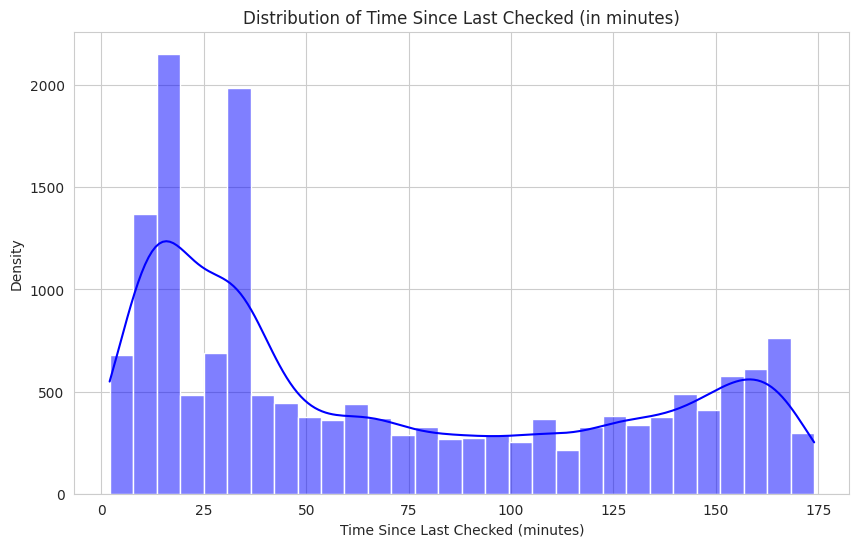

In [ ]:
# Plot the distribution of 'time_since_last_checked' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='time_since_last_checked', bins=30, kde=True, color='blue')
plt.title('Distribution of Time Since Last Checked (in minutes)')
plt.ylabel('Density')
plt.xlabel('Time Since Last Checked (minutes)')
plt.show()

The `time_since_last_checked` column appears to be right-skewed, with most values clustered around the lower end of the range.

**For Data Transformation:**

- This column may benefit from a transformation, such as a logarithmic transformation, to make its distribution more normal-like, especially if we plan to use algorithms sensitive to feature distributions.
- Categorical columns like `dot`, `state`, `city`, and `country` can be one-hot encoded or label encoded if they're to be used in machine learning models.

Next, let's address **Handling Outliers**. We'll check for outliers in the `time_since_last_checked` column using a box plot.

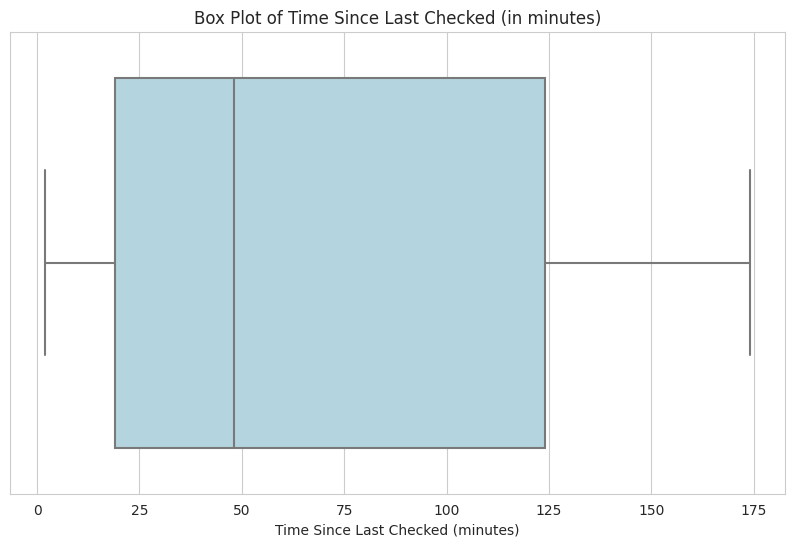

In [ ]:
# Plot a box plot for 'time_since_last_checked' column to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='time_since_last_checked', color='lightblue')
plt.title('Box Plot of Time Since Last Checked (in minutes)')
plt.xlabel('Time Since Last Checked (minutes)')
plt.show()

The box plot for the `time_since_last_checked` column reveals several data points that are considered outliers, as they lie outside the whiskers of the box plot.

**For Handling Outliers:**

- We can use techniques such as the IQR (Interquartile Range) method to formally identify these outliers.
- Once identified, we can decide on a strategy to handle them, such as capping, removing, or transforming.

**Identifying and Handling Outliers for the `time_since_last_checked` Column using the IQR (Interquartile Range) method:**

1. Calculate the first quartile (Q1) and third quartile (Q3) for the column.
2. Determine the IQR, which is the difference between Q3 and Q1.
3. Identify outliers as any value outside the range of [Q1 - 1.5 × IQR, Q3 + 1.5 × IQR].
4. Decide on a strategy to handle these outliers.

Let's start by identifying the outliers using the IQR method.


In [ ]:
# Calculate Q1, Q3 and IQR for 'time_since_last_checked' column
Q1 = data['time_since_last_checked'].quantile(0.25)
Q3 = data['time_since_last_checked'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = data[(data['time_since_last_checked'] < lower_bound) | (data['time_since_last_checked'] > upper_bound)]

# Display the number of outliers and some sample outlier rows
num_outliers = outliers.shape[0]
outliers_sample = outliers.sample(min(5, num_outliers))

num_outliers, outliers_sample

(0,
 Empty DataFrame
 Columns: [lat, lon, alt, is_broken, is_active, dot, state, city, street, country, last_checked, time_since_last_checked]
 Index: [])

It seems there are no outliers for the `time_since_last_checked` column based on the IQR method. This suggests that while the values did appear to be outliers visually in the box plot, they still fall within the acceptable range when we use the IQR method for outlier detection.

Given this result, no further action is required to handle outliers for this column.